# DS 3000 HW 4

Your Name: Diego Cicotoste

Due: Tuesday Nov 19 @ 11:59 PM EST

Extra Credit Deadline: Sunday Nov 17 @ 11:59 PM EST

### Submission Instructions
Submit this `ipynb` file to Gradescope (this can also be done via the assignment on Canvas).  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh `Kernel > Restart & Run All` just before uploading the `ipynb` file to gradescope. **In addition:**
- Make sure your name is entered above
- Make sure you comment your code effectively
- If problems are difficult for the TAs/Profs to grade, you will lose points

### Tips for success
- Start early
- Make use of Piazza (also accessible through Canvas)
- Make use of Office Hours
- Remember to use cells and headings to make the notebook easy to read (if a grader cannot find the answer to a problem, you will receive no points for it)
- Under no circumstances may one student view or share their ungraded homework or quiz with another student [(see also)](http://www.northeastern.edu/osccr/academic-integrity), though you are welcome to **talk about** (*not* show each other your answers to) the problems.

In [79]:
# packages that may come in handy
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Part 1: Writing Your Own Linear Regression Functions

In this part, you will write your own linear regression functions that can (and will) be used for Parts 2, 3, and 4. You must make sure that your functions pass the assert statements in each sub-part.

## Part 1.1: Line of Best Fit Function (10 points)

Write the function `line_of_best_fit`, including well written docstring, which takes as arguments `X` (an array, either 1-d or 2-d which includes all the predictor values, not including bias term) and `y` (a 1-d array which includes all corresponding response values to `X`) and returns the vector containing the coefficients for the line of best fit, including an intercept term. I have written the `add_bias_column` function below which you will want to use within your `line_of_best_fit` function. **Make sure the assert statement written in the final code cell of this sub-part passes.**

In [80]:
def add_bias_column(X):
    """
    Args:
        X (array): can be either 1-d or 2-d
    
    Returns:
        Xnew (array): the same array, but 2-d with a column of 1's in the first spot
    """
    
    # If the array is 1-d
    if len(X.shape) == 1:
        Xnew = np.column_stack([np.ones(X.shape[0]), X])
    
    # If the array is 2-d
    elif len(X.shape) == 2:
        bias_col = np.ones((X.shape[0], 1))
        Xnew = np.hstack([bias_col, X])
        
    else:
        raise ValueError("Input array must be either 1-d or 2-d")

    return Xnew

In [81]:
def line_of_best_fit(X, y):
    """
    Computes the coefficients for the line of best fit using ordinary least squares regression.

    Args:
        X (array): 1-d or 2-d array of predictor values (without bias term).
        y (array): 1-d array of corresponding response values.

    Returns:
        array: 1-d array containing the coefficients, where the first element is the intercept.
    """
    X_C = add_bias_column(X)
    line = np.linalg.inv(X_C.T @ X_C) @ X_C.T @ y
    
    return line


In [82]:
X = np.array([0,2,1,0,4])
y = np.array([3,8,2,3,6])

assert (np.isclose(line_of_best_fit(X, y), np.array([3., 1.]))).all()

## Part 1.2: Prediction and Assessment Function (10 points)

Write the function `linreg_predict`, including well written docstring, which takes as arguments:

- `Xnew` (an array, either 1-d or 2-d which includes all the $p$ predictor features, not including bias term)
- `ynew` (a 1-d array which includes all corresponding response values to `Xnew`)
- `m` (a 1-d array of length $p+1$ which contains the coefficients from the `line_of_best_fit` function)

The function should return a dictionary containing four key-value pairs:

- `'ypreds'` (the predicted values from applying `m` to `Xnew`)
- `'resids'` (the residuals, the differences between `ynew` and `ypreds`)
- `'mse'` (the mean squared error)
- `'r2'` (the coefficient of determination ($R^2$) representing the proportion of variability in `ynew` explained by the line of best fit
  - You **do not** have to calculate this manually; you may use the `r2_score` function from `sklearn` (imported for you below)

**Note** you will want to use the `add_bias_column` again within your function before calculating all the outputs in your dictionary. **Also, make sure the assert statement written in the final code cell of this sub-part passes.**

In [83]:
from sklearn.metrics import r2_score

In [84]:
def linreg_predict(Xnew, ynew, m):
    """
    Predicts the values, computes residuals, mean squared error, and R^2 score
    for a given dataset and model coefficients.

    Args:
        Xnew (array): 1-d or 2-d array of predictor features
        ynew (array): 1-d array of actual response values.
        m (array): 1-d array of length p+1 containing the coefficients from the line of best fit.

    Returns:
        dict: A dictionary containing:
            - 'ypreds': The predicted values
            - 'resids': The residuals (differences between ynew and ypreds)
            - 'mse': The mean squared error of the predictions
            - 'r2': The coefficient of determination (R^2)
    """
    Xnew_b = add_bias_column(Xnew)
    
    ypreds = Xnew_b @ m
    resids = ynew - ypreds
    mse = np.mean(resids ** 2)
    r2 = r2_score(ynew, ypreds)
    
    return {
        'ypreds': ypreds,
        'resids': resids,
        'mse': mse,
        'r2': r2
    }

In [85]:
def compare_dicts(dict1, dict2):
    if dict1.keys() != dict2.keys():
        return False

    for key in dict1:
        if not np.isclose(dict1[key], dict2[key]).all():
            return False

    return True

expected_out = {'ypreds': np.array([3., 5., 4., 3., 7.]),
                'resids': np.array([0., 3., -2., 0., -1.]),
                'mse': 2.8,
                'r2': 0.4444444444444444}

X = np.array([0,2,1,0,4])
y = np.array([3,8,2,3,6])

m = line_of_best_fit(X, y)
out = linreg_predict(X, y, m)

assert compare_dicts(expected_out, out)

# Part 2: Simple Linear Regression

For this problem you will use the `df_owl_2018.csv` file in your Homework Module on Canvas. This data set contains statistics from the 2018 Overwatch League (cleaned from [this website](https://overwatchleague.com/en-us/statslab?statslab=heroes)). You do not need to be an expert in Overwatch to complete this problem; I will provide all the context you need below. 

We are interested in a specific hero character you can play, Mercy. Mercy's primary purpose is to heal others. Sometimes when she is healing another character, that character manages to defeat an opponent. This counts as a `Defensive Assists` statistic. In this part, we will see if we can predict how many `Defensive Assists` a player achieves as Mercy given the amount of `Healing Done`, in thousands.

In [86]:
import pandas as pd

df_owl = pd.read_csv('df_owl_2018.csv')
df_owl.head()

,start_time,match_id,stage,map_type,map_name,player,team,hero,role,Ability Damage Done,...,Ultimates Used,Unscoped Accuracy,Unscoped Hits,Unscoped Shots,Venom Mine Kills,Weapon Accuracy,Weapon Kills,Whole Hog Efficiency,Whole Hog Kills,of Rockets Fired
0,2018-01-11 00:12:00,10223,Overwatch League - Stage 1,PAYLOAD,Dorado,Agilities,Los Angeles Valiant,Genji,Damage,0.0,...,8,0.0,0,0,0,0.273585,0,0.0,0,0.0
1,2018-01-11 00:12:00,10223,Overwatch League - Stage 1,PAYLOAD,Dorado,Danteh,San Francisco Shock,Genji,Damage,0.0,...,1,0.0,0,0,0,0.166667,0,0.0,0,0.0
2,2018-01-11 00:12:00,10223,Overwatch League - Stage 1,PAYLOAD,Dorado,Danteh,San Francisco Shock,Junkrat,Damage,0.0,...,3,0.0,0,0,0,0.137500,0,0.0,0,0.0
3,2018-01-11 00:12:00,10223,Overwatch League - Stage 1,PAYLOAD,Dorado,Danteh,San Francisco Shock,Tracer,Damage,0.0,...,3,0.0,0,0,0,0.327001,0,0.0,0,0.0
4,2018-01-11 00:12:00,10223,Overwatch League - Stage 1,PAYLOAD,Dorado,Envy,Los Angeles Valiant,D.Va,Tank,0.0,...,23,0.0,0,0,0,0.314785,0,0.0,0,0.0


## Part 2.1: Data Cleaning (5 points)

Before starting, we need to do two things:
1. subset the data set so that it only includes Mercy observations
    - **hint:** you should remove all `hero` values besides `Mercy`
2. divide the `Healing Done` column by `1000` so that the values are in thousands of points
    - this will assist in the interpretation of the slope
  
You do not have to, but it may help (and I recommend) to further clean the data to keep only the two columns we are interested in, `Healing Done` and `Defensive Assists`; or to simply cast those to arrays called `mercy_X` and `mercy_y` (respectively).

In [87]:
df_mercy = df_owl[df_owl['hero'] == 'Mercy'].copy()
df_mercy['Healing Done'] = df_mercy['Healing Done'] / 1000
df_mercy = df_mercy[['Healing Done', 'Defensive Assists']]
df_mercy.head()

,Healing Done,Defensive Assists
6,16.176682,38
12,20.522726,32
23,17.934605,41
34,21.049549,34
43,12.896022,22


## Part 2.2: Cross Validate, Predict, MSE, and $R^2$ (10 points)

Use the `train_test_split` function I've imported for you below to create a single-fold (70-30 split) cross validation set (i.e. `Xtrain`, `Xtest`, `ytrain`, `ytest`) using the Mercy data you cleaned in Part 2.1. In other words, for example, the `Xtrain` set should contain a random subset of about 70\% of the `Healing Done` values.

Using your functions from Part 1, apply the `line_of_best_fit` function to the training data. Then, use the `linreg_predict` function with the test data (and the output from the first function). Print out the resulting cross validated $MSE$ and $R^2$ values and **then**, in a markdown cell, interpret $R^2$ and discuss if you think it is reasonable based on that value to predict `Defensive Assists` with `Healing Done`.

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
Xtrain, Xtest, ytrain, ytest = train_test_split(df_mercy['Healing Done'].values, df_mercy['Defensive Assists'].values, test_size=0.3, random_state=42)
m = line_of_best_fit(Xtrain, ytrain)
pred = linreg_predict(Xtest, ytest, m)
mse = pred.get("mse", "")
r2 = pred.get("r2", "")

print(f"MSE: {mse}")
print(f"R2: {r2}")

MSE: 47.656132732522664
R2: 0.6585507434572969


## Part 2.3: Plot and Interpret the Full Line (5 points)

Now, fit the regression model to the full data set, then use the `show_fit()` function below to plot it and recover the final best fit line for the model. **Note** that your `line_of_best_fit` function is the only one you need here, and that you will have to remember which value in the output vector is the slope and which is the intercept.

**In a markdown cell**, interpret both the slope and intercept in the context of the problem, explaining what they mean (as best as you can). **Recall** you put `Healing Done` in thousands of points, which will affect the wording of your interpretation of the slope.

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

def get_mse(y_true, y_pred):
    # calculate the mean squared distance between the predicted and actual y
    return np.mean((y_true - y_pred) ** 2)

def show_fit(X, y, slope, intercept):
    plt.figure()
    
    # in case this wasn't done before, transform the input data into numpy arrays and flatten them
    x = np.array(X).ravel()
    y = np.array(y).ravel()
    
    # plot the actual data
    plt.scatter(x, y, label='data')
    
    # compute linear predictions 
    # x is a numpy array so each element gets multiplied by slope and intercept is added
    y_pred = slope * x + intercept
    
    # plot the linear fit
    plt.plot(x, y_pred, color='black',
             ls=':',
             label='linear fit')
    
    plt.legend()
    
    plt.xlabel('x')
    plt.ylabel('y')
    
    # print the mean squared error
    y_pred = slope * x + intercept
    mse = get_mse(y_true=y, y_pred=y_pred)
    plt.suptitle(f'y_hat = {slope:.3f} * x + {intercept:.3f}, MSE = {mse:.3f}')

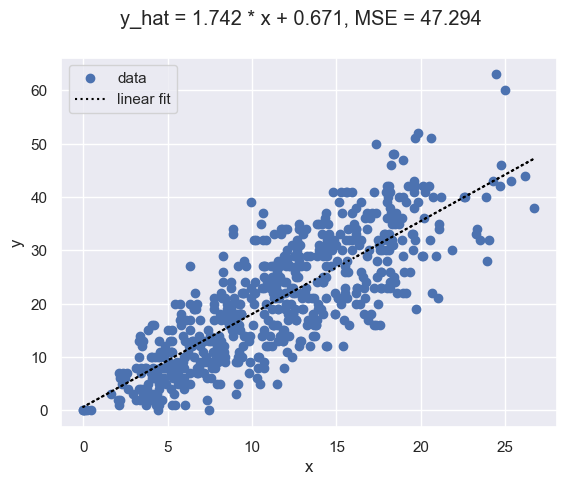

In [91]:
X = df_mercy['Healing Done'].values
y = df_mercy['Defensive Assists'].values

coefficients = line_of_best_fit(X, y)
intercept, slope = coefficients[0], coefficients[1]  

show_fit(X, y, slope, intercept)

The slope represents the rate of change in the 'Defensive Assists' for every thoiusands points of healing. If the slope is going up it shows that there is healing being done.

## Part 2.4: Make a Prediction (5 points)

Dr. Gerber used to play Overwatch back in the day, and would usually play as Mercy (he doesn't like playing games to hurt people, prefers to heal them).

In the best game Dr. Gerber ever played (and this is true) he did 16223 points of Healing Done. Unfortunately, the video game doesn't tell Dr. Gerber how many Defensive Assists he had in that specific game. Use the model to predict Dr. Gerber's Defensive Assists for him.

In [92]:
healing_done = 16223 / 1000  # convertint to the thousands 

predicted_defensive_assists = slope * healing_done + intercept

predicted_defensive_assists

28.938827528765643

## Part 2.5: Check Assumptions and Make Recommendations (5 points)

Use plots to check to see if the residuals meet the assumptions for performing a linear regression:
1. independence
2. constant variance/linearity
3. normality

**Note** that you will want to use your `linreg_predict` function, using the **full data set** as your `Xnew` and `ynew` values, to get the residuals for the purposes of this question.

Then, **in a markdown cell**, write 3-4 sentences about whether the model meets the assumptions, what that tells you about the usefulness of the model, and recommendations for next steps (if any).

In [93]:
import scipy.stats as stats
import pylab as py

pred = linreg_predict(X, y, coefficients)
residuals = pred['resids']

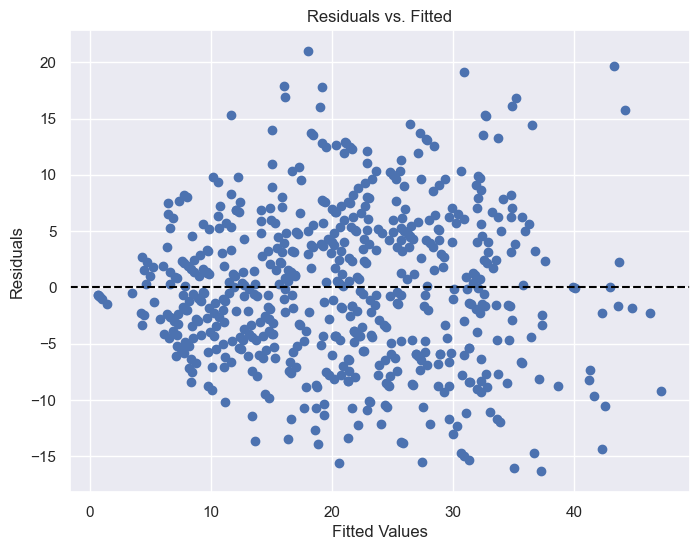

In [94]:
plt.figure(figsize=(8, 6))
plt.scatter(pred['ypreds'], residuals)
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted')
plt.show()

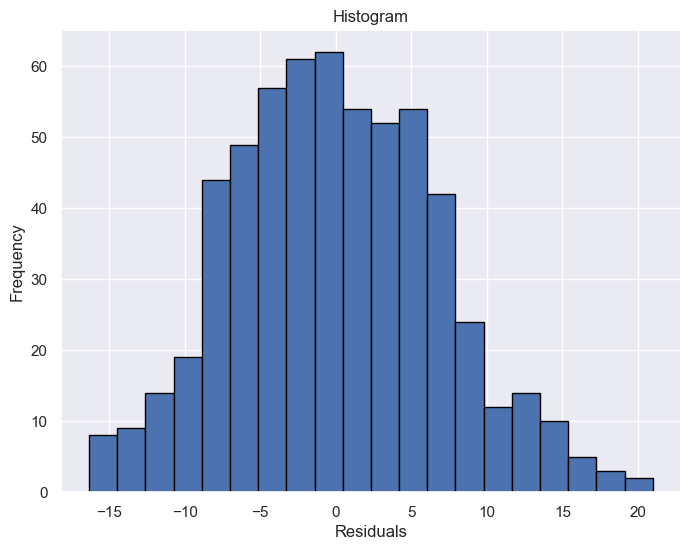

In [95]:
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=20, edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.show()

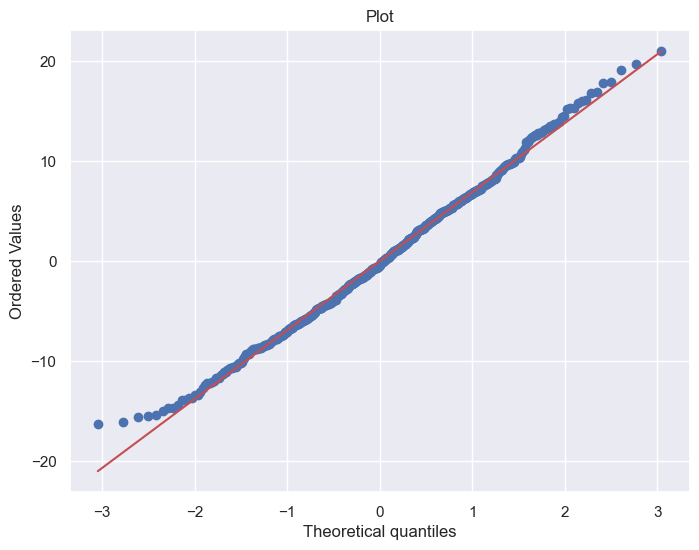

In [96]:
plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=py)
py.title('Plot')
py.show()

The first graph does not tells us much, however, it tells us that everything above the line we can predict Residuals is positive and everything bellow we can predict Residuals is negative. In the second graph we can see where there is the most frequency in the residuals. In the last graph we can see how the ordered paired form a linear slope. 

# Part 3: Multiple Regression

In Part 3 and Part 4, you will use the `FuelConsumptionCo2.csv` file (from your Homework Module on Canvas) to build two candidate models to predict a vehicle's Carbon Dioxide Emissions (`CO2EMISSIONS`).

In [97]:
df_fuel = pd.read_csv('FuelConsumptionCo2.csv')
df_fuel.dropna(inplace=True)
df_fuel.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## Part 3.1: Data Pre-Processing (10 points)

Our first model will be a multiple regression model where we try to predict `CO2EMISSIONS` with `ENGINESIZE`, `CYLINDERS` and `FUELCONSUMPTION_COMB_MPG`. Create your `X` and `y` arrays. Make sure that:

- You scale the $x$ features **using standardization**
- You do **not** include a bias column in `X`

Defining the feature list:

    x_feat_list = ['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB_MPG']

may help. Your `X` should pass the assert statement in the cell before Part 3.2. **Note** if you use a different type of normalization besides standardization (i.e. other than subtracting the mean and dividing all features by their corresponding standard deviations) the assert will not pass.

In [98]:
x_feat_list = ['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB_MPG']

X = df_fuel[x_feat_list].values
y = df_fuel['CO2EMISSIONS'].values
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X = (X - X_mean) / X_std

X[0]

array([-0.89452245, -0.93678799,  0.83821454])

In [99]:
# check if 
assert np.isclose(X[0], np.array([-0.89452245, -0.93678799, 0.83821454])).all()

## Part 3.2: Cross Validation (5 points)

Using single-fold cross validation with a 70-30 split, create `Xtrain`, `Xtest`, `ytrain`, and `ytest`.

Fit the model using **your own** `line_of_best_fit` function to `Xtrain` and `ytrain`.

Then pass `Xtest`, `ytest`, and the output from the `line_of_best_fit` to your `linreg_predict` function, saving that as something. 

Print out the cross-validated $MSE$ and $R^2$ values. You do not have to comment on their values yet; but you will in Part 4.4 as part of comparing this model with the one from Part 4.

In [100]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=42)
coefficients = line_of_best_fit(Xtrain, ytrain)

pred = linreg_predict(Xtest, ytest, coefficients)
mse = pred.get("mse", "")
r2 = pred.get("r2", "")

print(f"MSE: {mse}")
print(f"R^2: {r2}")

MSE: 246.93803957058225
R^2: 0.9380372157008698


## Part 3.3: Checking Assumptions (10 points)

Now fit the full model using your `line_of_best_fit` function, and generate the residuals using your `linreg_predict` function. Create 5 residual plots in order to check that the assumptions of independence, constant variance, and normality are met for the model you built:

- A plot of the index vs. the residuals
- A plot of `ENGINESIZE` vs. the residuals
- A plot of `CYLINDERS` vs. the residuals
- A plot of `FUELCONSUMPTION_COMB_MPG` vs. the residuals
- A histogram (or normal probability quantile-quantile plot) of the residuals

You do not have to comment on these plots yet; but you will in Part 4.4 as part of comparing this model with the one from Part 4.

In [101]:
coefficients = line_of_best_fit(X, y)
pred = linreg_predict(X, y, coefficients)
residuals = pred['resids']

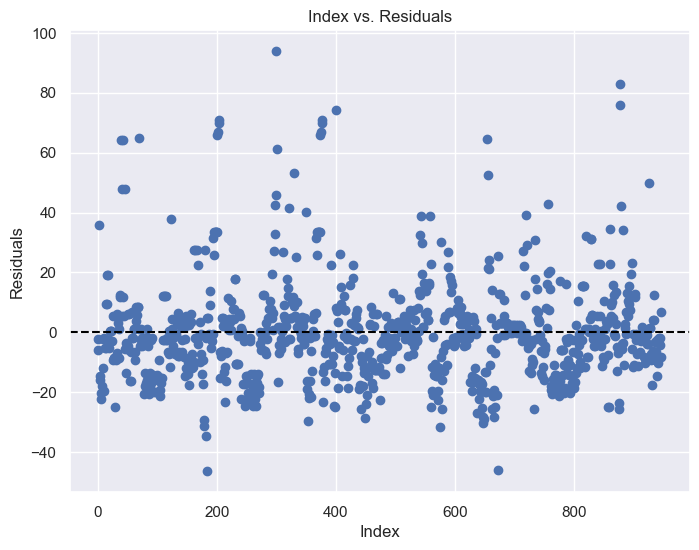

In [102]:
plt.figure(figsize=(8, 6))
plt.plot(range(len(residuals)), residuals, marker='o', linestyle='none')
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Index')
plt.ylabel('Residuals')
plt.title('Index vs. Residuals')
plt.show()

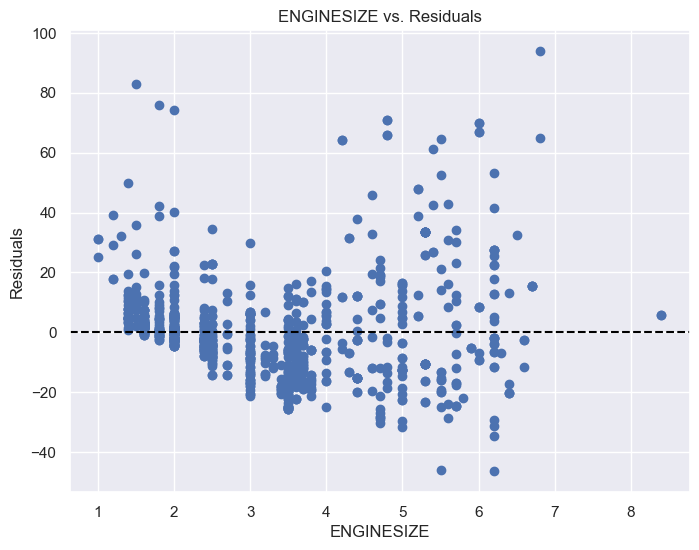

In [103]:
plt.figure(figsize=(8, 6))
plt.scatter(df_fuel['ENGINESIZE'], residuals)
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('ENGINESIZE')
plt.ylabel('Residuals')
plt.title('ENGINESIZE vs. Residuals')
plt.show()

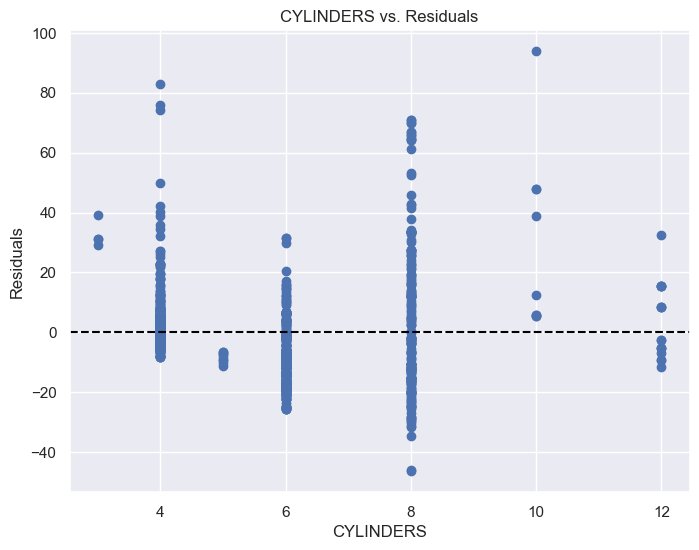

In [104]:
plt.figure(figsize=(8, 6))
plt.scatter(df_fuel['CYLINDERS'], residuals)
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('CYLINDERS')
plt.ylabel('Residuals')
plt.title('CYLINDERS vs. Residuals')
plt.show()

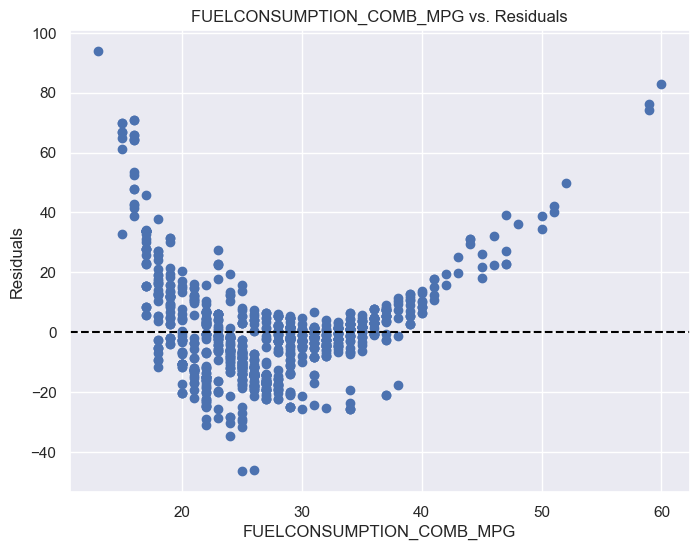

In [105]:
plt.figure(figsize=(8, 6))
plt.scatter(df_fuel['FUELCONSUMPTION_COMB_MPG'], residuals)
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('FUELCONSUMPTION_COMB_MPG')
plt.ylabel('Residuals')
plt.title('FUELCONSUMPTION_COMB_MPG vs. Residuals')
plt.show()

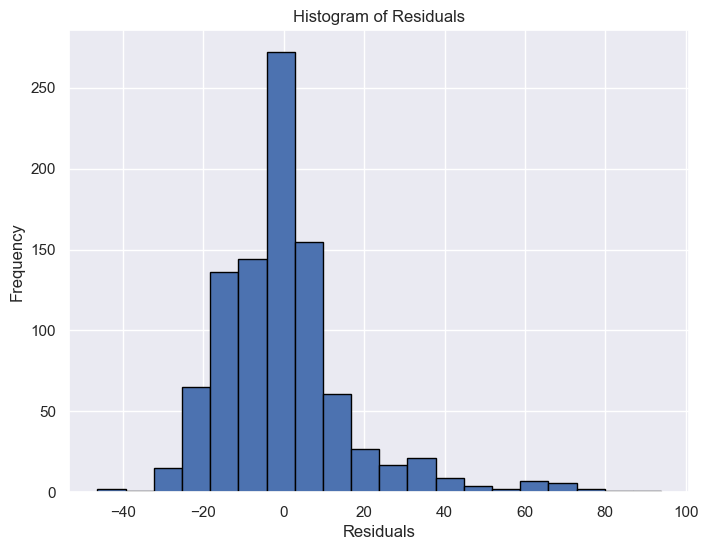

In [106]:
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=20, edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

# Part 4: Polynomial Regression

We will compare the model you built in Part 3 with a polynomial regression model where we try to predict `CO2EMISSIONS` with only `FUELCONSUMPTION_COMB_MPG`.

## Part 4.1: Creating the Design Matrix (5 points)

Use the `PolynomialFeatures` and `.fit_transform` functions to convert the `FUELCONSUMPTION_COMB_MPG` ($x$) feature into an array (**CALL THIS `X_poly`**) that includes **four** columns corresponding to building a quartic model for `CO2EMISSIONS` ($y$) along the lines of: $y = \beta_0 + \beta_1 x + \beta_2 x^2 + \beta_3 x^3 + \beta_4 x^4$. I have started the process for you by defining the array containing only our target feature, `X_fuel`.

**Note** that the `.fit_transform` function will produce by default **five** columns, including the bias column. Your functions take arrays that do not have this, so you should remove it.

Your `X_poly` should pass the assert statement in the cell before Part 4.2. 

**Note**: Do *not* scale your features (it is unnecessary, since there is really only one, albeit raised to different powers, and will cause an assert error).

In [107]:
from sklearn.preprocessing import PolynomialFeatures

X_fuel = np.array(df_fuel['FUELCONSUMPTION_COMB_MPG']).reshape(-1,1)

In [108]:
poly = PolynomialFeatures(degree=4, include_bias=True)
X_poly_with_bias = poly.fit_transform(X_fuel)

X_poly = X_poly_with_bias[:, 1:]

X_poly[0]


array([3.300000e+01, 1.089000e+03, 3.593700e+04, 1.185921e+06])

In [109]:
assert np.isclose(X_poly[0], np.array([33, 1089, 35937, 1185921])).all()

## Part 4.2: Cross Validation (5 points)

Using single-fold cross validation with a 70-30 split, create `Xtrain`, `Xtest`, `ytrain`, and `ytest` (from `X_poly` from Part 4.1 and `y` as defined before).

Fit the model using **your own** `line_of_best_fit` function to `Xtrain` and `ytrain`.

Then pass `Xtest`, `ytest`, and the output from the `line_of_best_fit` to your `linreg_predict` function, saving that as something. 

Print out the cross-validated $MSE$ and $R^2$ values. You do not have to comment on their values yet; but you will in Part 4.4 as part of comparing this model with the one from Part 3.

In [110]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X_poly, y, test_size=0.3, random_state=42)

coefficients = line_of_best_fit(Xtrain, ytrain)

pred = linreg_predict(Xtest, ytest, coefficients)
mse = pred.get("mse", "")
r2 = pred.get("r2", "")

print(f"MSE: {mse}")
print(f"R^2: {r2}")

MSE: 11.097077880190056
R^2: 0.9972154721717376


## Part 4.3: Checking Assumptions (5 points)

Now fit the full model using your `line_of_best_fit` function, and generate the residuals using your `linreg_predict` function. Create 3 residual plots in order to check that the assumptions of independence, constant variance, and normality are met for the model you built:

- A plot of the index vs. the residuals
- A plot of `FUELCONSUMPTION_COMB_MPG` vs. the residuals
- A histogram (or normal probability quantile-quantile plot) of the residuals

You do not have to comment on these plots yet; but you will in Part 4.4 as part of comparing this model with the one from Part 3.

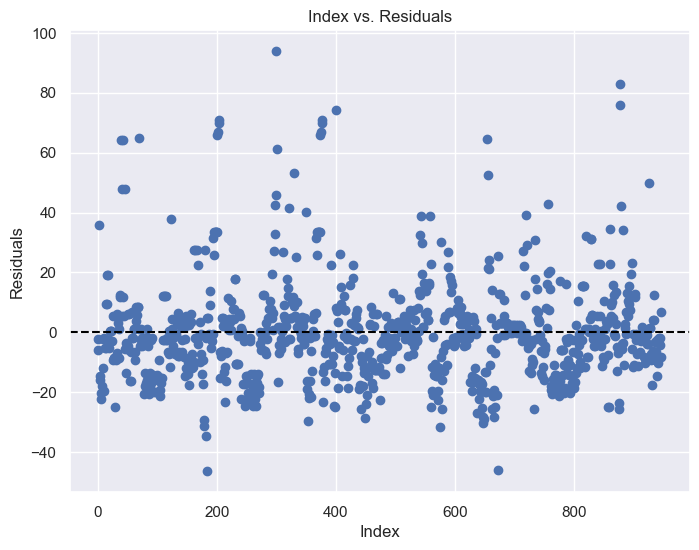

In [111]:
plt.figure(figsize=(8, 6))
plt.plot(range(len(residuals)), residuals, marker='o', linestyle='none')
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Index')
plt.ylabel('Residuals')
plt.title('Index vs. Residuals')
plt.show()

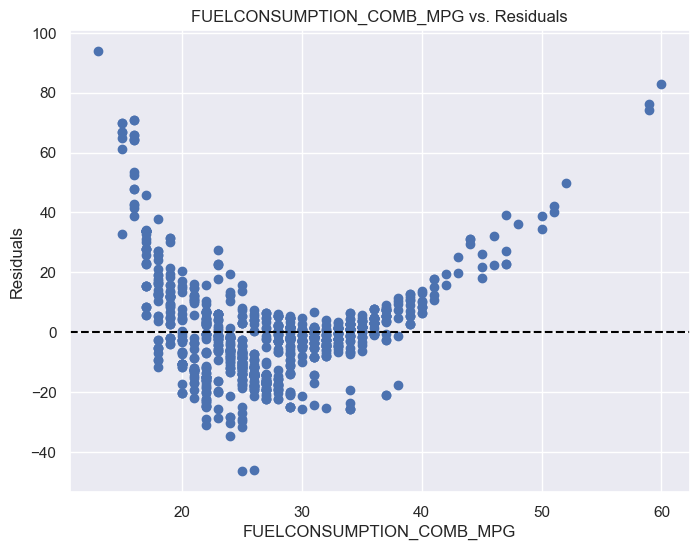

In [112]:
plt.figure(figsize=(8, 6))
plt.scatter(df_fuel['FUELCONSUMPTION_COMB_MPG'], residuals)
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('FUELCONSUMPTION_COMB_MPG')
plt.ylabel('Residuals')
plt.title('FUELCONSUMPTION_COMB_MPG vs. Residuals')
plt.show()

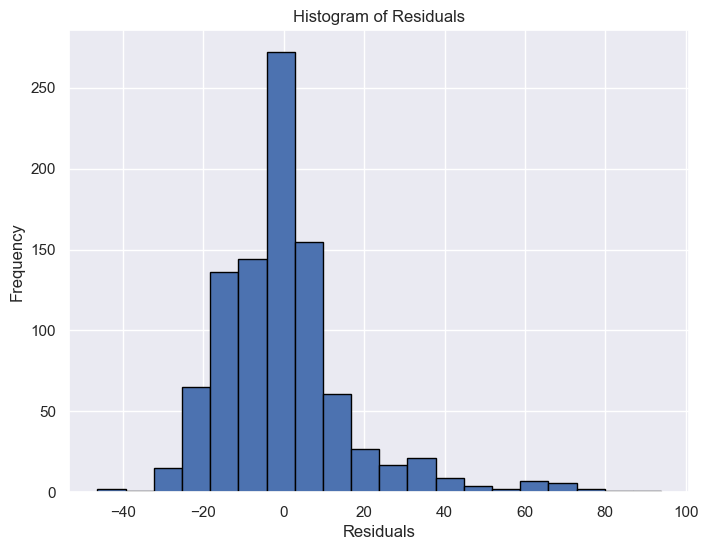

In [113]:
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=20, edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()


## Part 4.4: Conclusions (10 points)

**In a markdown cell**, give a *lengthy and **detailed*** discussion of the two candidate models from Parts 3 and 4. Discuss each of their strengths/weaknesses/benefits (i.e. which model had the better $R^2$? which had the better $MSE$? which assumptions were met for each model and which were not?). Then, **make a decision** about which model you would suggest (if you **had** to choose) is most appropriate to use for predicting a vehicle's Carbon Dioxide Emissions. Do you have any thoughts about improving either/both of these models? **Discuss this as well.**

We built 2 models to predit the car's fuel emissions. The first model, **Part 3**, was a simple mulltiple linear regression using `ENGINESIZE`, `CYLINDERS`, and `FUELCOMSUPTIOS`. It is easy to interpret and follow the basic assumptiosn of the liner rergession. However, since it is so simple and straightforward model, it did not do a good job at capturing any nonlinear relationships in the data. The R^2, which shows how well the model explains emissions, was better, but still has room for improvement. 

The second model build, **Part 4**, we took a different approach with polunomial regression. It focused more on one feature, the `FUELCOMSUPTIOS`. But added higher-order terms to capture nonlinear patterns. This model performed better than **Part 3** with an higher R^2 and it made better preditctions. However, it was more complex, harder to interpet, and it could vary with sometimes being inconsistent.

I belive the second model is better, **Part 4** because it is more accurate. But I would make the model not being very specific and more learnint. Because with some outliner it could switch the data set a lot. For the linear model, adding some interaction terms or tweaking it a bit could help it balance simplicity with better performance.